In [ ]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
#Adding avocados.py directly in this colab for further use 

from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import py_compile

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"


In [ ]:
assert ran_the_first_cell, "hello"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
list2 = ["one", 2, 3, 4.0, "five", 6]
list2

['one', 2, 3, 4.0, 'five', 6]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Lists can be indexed like C-style arrays.
first = list2[0]
second = list2[1]
print("first:", first)
print("second:", second)

first: one
second: 2


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = list2[-1]
penultimate = list2[-2]
print("last:", last)
print("second to last:", penultimate)

last: 6
second to last: five


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist2 = list2[1:3]
sublist2

[2, 3]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = list2[:3]
first_three

['one', 2, 3]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = list2[3:]
after_three

[4.0, 'five', 6]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
list2 = ['i', 'j', 'k', 'l', 'm', 'n', 'o','p']
list2[2:7:2]

['k', 'm', 'o']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# This is a cute way to reverse a list.
list2[::-1]

['p', 'o', 'n', 'm', 'l', 'k', 'j', 'i']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
list2 = [6, 7, 8, 9, 10]
print("Before:", list2)
list2.append('eleven')
print("After:", list2)

Before: [6, 7, 8, 9, 10]
After: [6, 7, 8, 9, 10, 'eleven']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
# Comprehensions let us perform elementwise computations.
list2 = [6, 7, 8, 9, 10]
[x * 2 for x in list2]

[12, 14, 16, 18, 20]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Dictionaries are key-value mappings.
players = {'David': 'Beckham', 'Manuel': 'Neuer', 'Ronaldinho': 'Gaucho'}
players

{'David': 'Beckham', 'Manuel': 'Neuer', 'Ronaldinho': 'Gaucho'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
# Like lists, dictionaries are size-mutable.
players['James'] = 'Rodriguez'
players

{'David': 'Beckham',
 'James': 'Rodriguez',
 'Manuel': 'Neuer',
 'Ronaldinho': 'Gaucho'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
del players['David']
players

{'James': 'Rodriguez', 'Manuel': 'Neuer', 'Ronaldinho': 'Gaucho'}

In [ ]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
# Suppose we have some matrices...
c = [[10, 9, 8],
     [7, 6, 5],
     [4, 3, 2],
     [1, 0, 1]]

d = [[11, 22, 33, 44],
     [21, 31, 41, 51]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 26 µs, sys: 4 µs, total: 30 µs
Wall time: 33.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time

matmul(c, d)

CPU times: user 33 µs, sys: 6 µs, total: 39 µs
Wall time: 51.7 µs


[[299, 499, 699, 899],
 [203, 340, 477, 614],
 [107, 181, 255, 329],
 [11, 22, 33, 44]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.4444329152637536, 0.47494583727928397, 0.7906425104227333],
 [0.6218914764126995, 0.28766372242997007, 0.4803314593711282]]

In [ ]:
randm = random_matrix(5, 2)
randm

[[0.2168366717026876, 0.06741237418496726],
 [0.16330558893996128, 0.5573403517149709],
 [0.8864834609718965, 0.5472746017577926],
 [0.8240191426504094, 0.8423060050777295],
 [0.14044572688003676, 0.12070736308569208]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.56 s, sys: 7.98 ms, total: 5.57 s
Wall time: 5.6 s


In [ ]:
%%time
randa = random_matrix(20, 15)
randb = random_matrix(15, 60)
f = matmul(randa, randb)

CPU times: user 4.06 ms, sys: 1 ms, total: 5.06 ms
Wall time: 5.54 ms


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
list_data2 = [float(i) for i in range(5000)]
array_data2 = np.array(list_data2)

In [ ]:
%%time
python_dot_product(list_data, list_data)    

CPU times: user 9.89 ms, sys: 0 ns, total: 9.89 ms
Wall time: 11.1 ms


333328333350000.0

In [ ]:
%%time
python_dot_product(list_data2, list_data2)

CPU times: user 720 µs, sys: 0 ns, total: 720 µs
Wall time: 949 µs


41654167500.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 210 µs, sys: 10 µs, total: 220 µs
Wall time: 227 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data2, array_data2)

CPU times: user 20 µs, sys: 1e+03 ns, total: 21 µs
Wall time: 24.1 µs


41654167500.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
mul_elemwise([5, 6, 7, 8], [9, 12 + 5j, 3.0, 'six'])
#[type(x) for x in _]

[45, (72+30j), 21.0, 'sixsixsixsixsixsixsixsix']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [ ]:
# Interpretation overhead.
source_code2 = 'c + a * b'
bytecode2 = compile(source_code2, '', 'eval')
import dis; dis.dis(bytecode2)

  1           0 LOAD_NAME                0 (c)
              2 LOAD_NAME                1 (a)
              4 LOAD_NAME                2 (b)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data2 = np.array([5, 6, 7, 8])
data2

array([5, 6, 7, 8])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
data2 + data2

array([10, 12, 14, 16])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.14 ms, sys: 0 ns, total: 1.14 ms
Wall time: 1.44 ms


333328333350000.0

In [ ]:
%%time
# Naive dot product
(array_data2 * array_data2).sum()

CPU times: user 92 µs, sys: 5 µs, total: 97 µs
Wall time: 101 µs


41654167500.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.2 ms, sys: 3.01 ms, total: 4.21 ms
Wall time: 5.24 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data2.dot(array_data2)

CPU times: user 27 µs, sys: 2 µs, total: 29 µs
Wall time: 32.2 µs


41654167500.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 182 µs, sys: 9 µs, total: 191 µs
Wall time: 198 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data2, array_data2)

CPU times: user 24 µs, sys: 1e+03 ns, total: 25 µs
Wall time: 28.8 µs


41654167500.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
#data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
# We **can** reshape an array though.
two_by_two2 = data2.reshape(2,2)
two_by_two2

array([[5, 6],
       [7, 8]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
arr = np.array([7, 8, 9, 10, 15, 16, 18, 19, 20, 25, 26, 27], dtype='int16').reshape(3, 4)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[ 7  8  9 10]
 [15 16 18 19]
 [20 25 26 27]]
DType: int16
Shape: (3, 4)
Strides: (8, 2)
Data: b'\x07\x00\x08\x00\t\x00\n\x00\x0f\x00\x10\x00\x12\x00\x13\x00\x14\x00\x19\x00\x1a\x00\x1b\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data2 = np.arange(12).reshape(3, 4)
data2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
data2 * data2

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Unary functions.
np.sqrt(data2)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Comparison operations
(data2 % 2) == 0

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data2 % 2) == 0) & ((data2 % 3) == 0)

array([[ True, False, False, False],
       [False, False,  True, False],
       [False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data2 @ data2.T

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines2 = np.sin(np.linspace(0, 3.14159265, 10))
cosines2 = np.cos(np.linspace(0, 3.14159265, 10))
sines2

array([0.00000000e+00, 3.42020143e-01, 6.42787609e-01, 8.66025403e-01,
       9.84807753e-01, 9.84807753e-01, 8.66025405e-01, 6.42787612e-01,
       3.42020146e-01, 3.58979303e-09])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
# Slicing works with the same semantics as Python lists.
sines2[4]

0.9848077527351587

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines2[:4]  # First four elements  

array([0.        , 0.34202014, 0.64278761, 0.8660254 ])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines2[4:]  # Elements from 4 on.

array([9.84807753e-01, 9.84807753e-01, 8.66025405e-01, 6.42787612e-01,
       3.42020146e-01, 3.58979303e-09])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
sines2[::3]  # Every three elements.

array([0.00000000e+00, 8.66025403e-01, 8.66025405e-01, 3.58979303e-09])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines2:\n", sines2)
print("sines2 > 0.25:\n", sines2 > 0.25)
print("sines2[sines2 > 0.25]:\n", sines2[sines2 > 0.25])

sines2:
 [0.00000000e+00 3.42020143e-01 6.42787609e-01 8.66025403e-01
 9.84807753e-01 9.84807753e-01 8.66025405e-01 6.42787612e-01
 3.42020146e-01 3.58979303e-09]
sines2 > 0.25:
 [False  True  True  True  True  True  True  True  True False]
sines2[sines2 > 0.25]:
 [0.34202014 0.64278761 0.8660254  0.98480775 0.98480775 0.8660254
 0.64278761 0.34202015]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
print(sines)
sines[[9, 1, 3]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.00159265, 0.34185385, 0.86575984])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
unsorted_data2 = np.array([1, 4, 7, 22, -7, 2, -2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
sort_indices2 = np.argsort(unsorted_data2)
sort_indices2

array([4, 6, 0, 5, 1, 2, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
unsorted_data2[sort_indices2]

array([-7, -2,  1,  2,  4,  7, 22])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
market_caps2 = np.array([2, 1, 16, 15, 7])  # Presumably in dollars?
assets2 = np.array(['a', 'b', 'c', 'd', 'e'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap2 = np.argsort(market_caps2)
assets2[sort_by_mcap2]

array(['b', 'a', 'e', 'd', 'c'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
# Indexers are also useful for aligning data.

feb2017 = pd.to_datetime(['2017-02-03 00:00:00+00:00',
 '2017-02-04 00:00:00+00:00',
 '2017-02-05 00:00:00+00:00',
 '2017-02-06 00:00:00+00:00',
 '2017-02-09 00:00:00+00:00',
 '2017-02-10 00:00:00+00:00',
 '2017-02-11 00:00:00+00:00',
 '2017-02-12 00:00:00+00:00',
 '2017-02-13 00:00:00+00:00',
 '2017-02-17 00:00:00+00:00',
 '2017-02-18 00:00:00+00:00',
 '2017-02-19 00:00:00+00:00',
 '2017-02-20 00:00:00+00:00',
 '2017-02-23 00:00:00+00:00',
 '2017-02-24 00:00:00+00:00',
 '2017-02-25 00:00:00+00:00',
 '2017-02-26 00:00:00+00:00',
 '2017-02-27 00:00:00+00:00'])

calendar2 = feb2017.values.astype('datetime64[D]')

event_dates2 = pd.to_datetime(['2017-02-06 00:00:00+00:00', 
                             '2017-02-07 00:00:00+00:00', 
                             '2017-02-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values2 = np.array([11, 14, 21])

print("Dates:\n", repr(event_dates2))
print("Values:\n", repr(event_values2))
print("Calendar:\n", repr(calendar2))

Dates:
 array(['2017-02-06', '2017-02-07', '2017-02-08'], dtype='datetime64[D]')
Values:
 array([11, 14, 21])
Calendar:
 array(['2017-02-03', '2017-02-04', '2017-02-05', '2017-02-06',
       '2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12',
       '2017-02-13', '2017-02-17', '2017-02-18', '2017-02-19',
       '2017-02-20', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-26', '2017-02-27'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [ ]:
print("Raw Dates:", event_dates2)
print("Indices:", calendar2.searchsorted(event_dates2))
print("Forward-Filled Dates:", calendar2[calendar2.searchsorted(event_dates2)])

Raw Dates: ['2017-02-06' '2017-02-07' '2017-02-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-02-06' '2017-02-09' '2017-02-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data2 = np.arange(15).reshape(3, 5)
data2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data2[:3, :3]  # First three rows and first three columns.

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data2[:2, [1, -2]]  # First two rows, first and last columns.

array([[1, 3],
       [6, 8]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
data2[(data2[:, 0] % 3) == 0]  # Rows where the first column is divisible by two.

array([[0, 1, 2, 3, 4]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.026104613660508

In [ ]:
variance(np.random.standard_normal(1500))

0.9216802875240645

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
data2 = np.arange(20)
data2.mean()

9.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data2 = np.arange(15).reshape(3, 5)
data2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data.mean()

14.5

In [ ]:
data2.mean()

7.0

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data2.mean(axis=0)

array([5., 6., 7., 8., 9.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
data2.mean(axis=1)

array([ 2.,  7., 12.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row2 = np.array([5, 6, 7, 8])
column2 = np.array([[10], [20], [30]])
print("Row:\n", row2, sep='')
print("Column:\n", column2, sep='')

Row:
[5 6 7 8]
Column:
[[10]
 [20]
 [30]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
row2 + column2

array([[15, 16, 17, 18],
       [25, 26, 27, 28],
       [35, 36, 37, 38]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data2, sep='')
print("Mean:\n", data2.mean(axis=0), sep='')
print("Data - Mean:\n", data2 - data2.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Mean:
[5. 6. 7. 8. 9.]
Data - Mean:
[[-5. -5. -5. -5. -5.]
 [ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
s2 = pd.Series(index=['1', '2', '3', '4', '5'], data=[10, 20, 30, 40, 50])
s2

1    10
2    20
3    30
4    40
5    50
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s2.index)
print("The values are:", s2.values)

The index is: Index(['1', '2', '3', '4', '5'], dtype='object')
The values are: [10 20 30 40 50]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# We can look up values out of a Series by position...
s2.iloc[0]

10

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# ... or by label.
s2.loc['1']

10

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# Slicing works as expected...
s2.iloc[:2]

1    10
2    20
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# ...but it works with labels too!
s2.loc[:'4']

1    10
2    20
3    30
4    40
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s2.iloc[[0, -1]]

1    10
5    50
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s2.loc[s2 > 2]

1    10
2    20
3    30
4    40
5    50
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
# Element-wise operations are aligned by index.
other_s1 = pd.Series({'A': 11.0, 'B': 12.0, 'C': 13.0, 'D': 14.0})
other_s1

A    11.0
B    12.0
C    13.0
D    14.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
s2 + other_s1

1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
A   NaN
B   NaN
C   NaN
D   NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s2 + other_s1).fillna(0.0)

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
url = 'https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv'
aapl= pd.read_csv(url, parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Most real datasets are read in from an external file format.
aapl2= pd.read_csv(url, parse_dates=['Close'], index_col='Close')
aapl2.head()

,Date,Adj Close,High,Low,Open,Volume
Close,,,,,,
30.572857,2010-01-04,27.613066,30.642857,30.340000,30.490000,123432400.0
30.625713,2010-01-05,27.660807,30.798571,30.464285,30.657143,150476200.0
30.138571,2010-01-06,27.220825,30.747143,30.107143,30.625713,138040000.0
30.082857,2010-01-07,27.170504,30.285715,29.864286,30.250000,119282800.0
30.282858,2010-01-08,27.351143,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl2.iloc[:2, :2]

,Date,Adj Close
Close,,
30.572857,2010-01-04,27.613066
30.625713,2010-01-05,27.660807


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [ ]:
aapl.loc[pd.Timestamp('2010-03-01'):pd.Timestamp('2010-03-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-03-01,29.855715,137523400.0
2010-03-02,29.835714,141636600.0
2010-03-03,29.904285,93013200.0
2010-03-04,30.101429,91510300.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

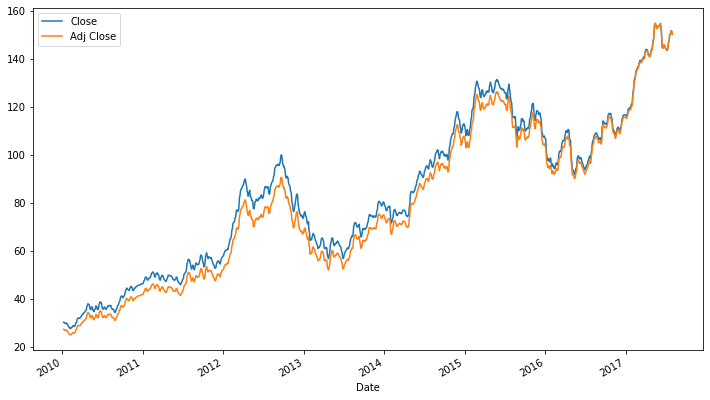

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

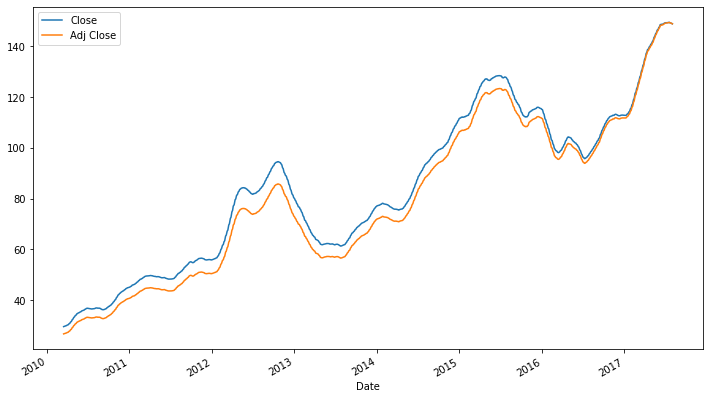

In [ ]:
aapl.rolling(50)[['Close', 'Adj Close']].mean().plot();

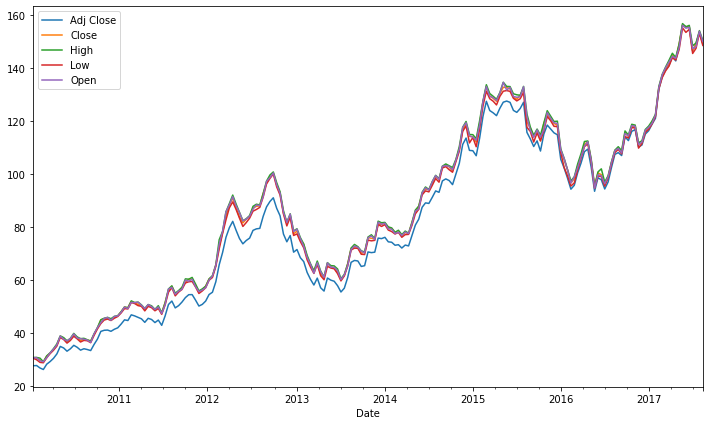

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

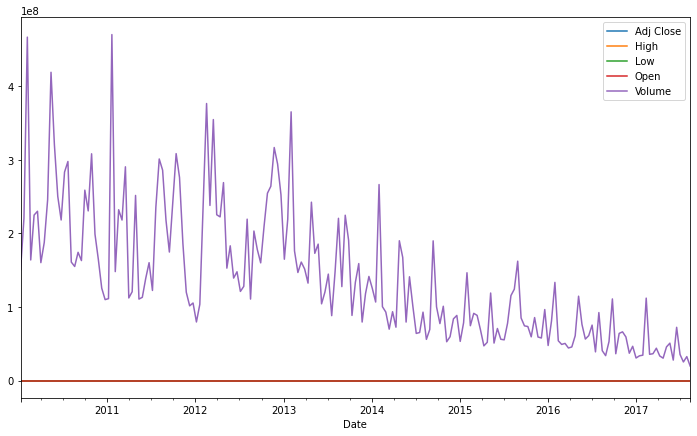

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Close', axis=1).resample('2W').max().plot();

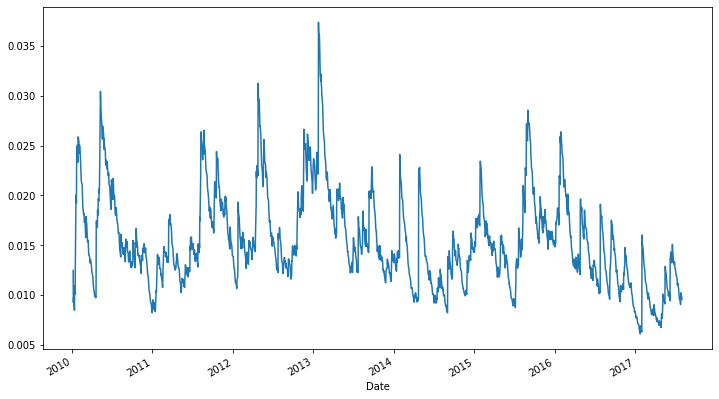

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

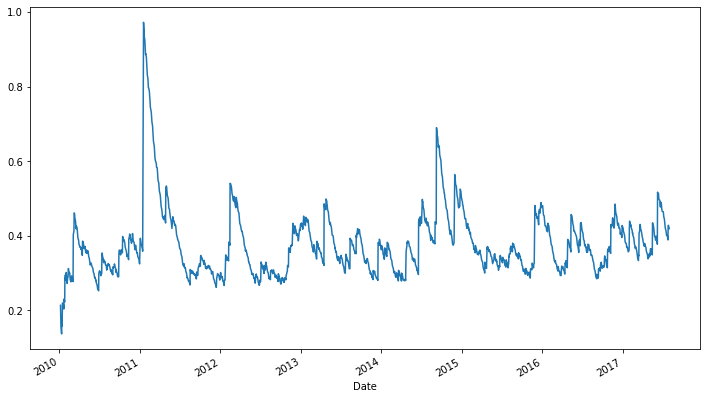

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Volume'].pct_change().ewm(span=60).std().plot();

# "Real World" Data

In [ ]:
avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
avocados2 = read_avocadata('2015', '2016')
avocados2.head(8)

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.50,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.50,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.50,1.99
5,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,True,196,2.29,2.29,2.29
6,2014-01-03 00:00:00+00:00,MIDWEST,HASS,False,2127,0.88,0.50,1.67
7,2014-01-03 00:00:00+00:00,MIDWEST,HASS,True,19,1.52,0.99,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados2.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

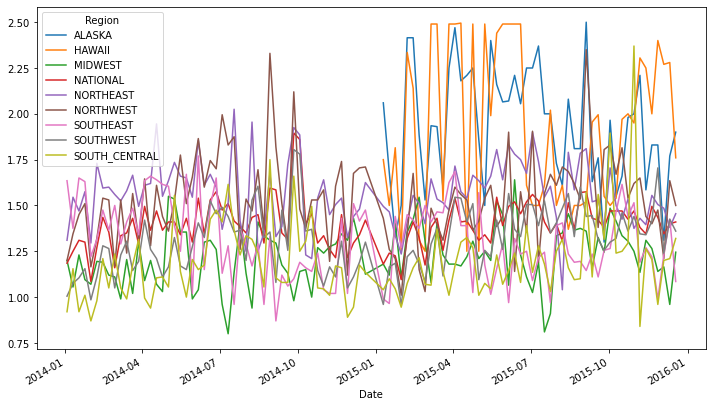

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

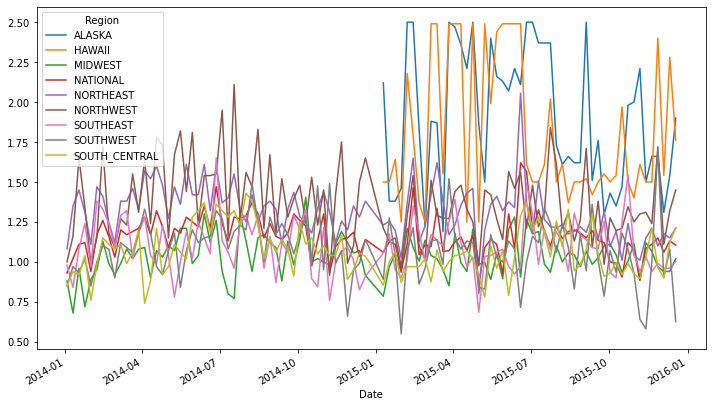

In [ ]:
hass2 = avocados2[avocados2.Organic == False]
hass2.groupby(['Date','Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

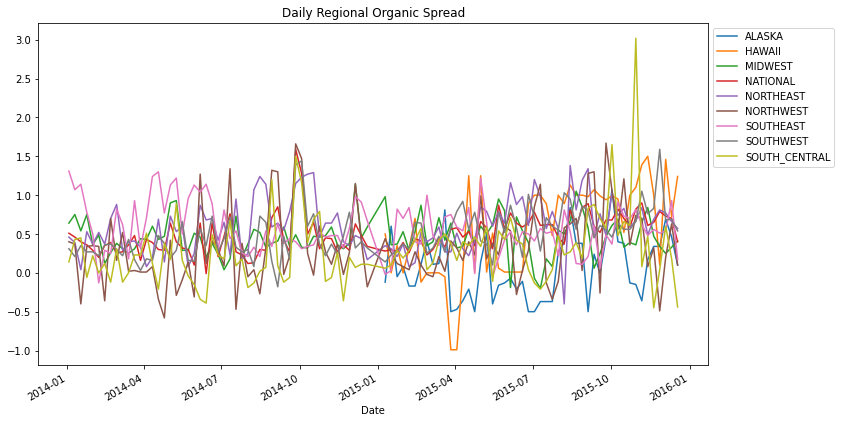

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

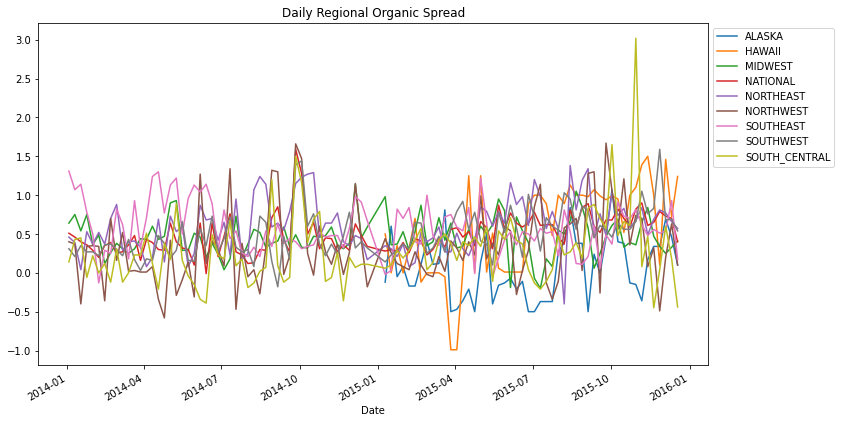

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [ ]:
spread_correlation2 = organic_spread_by_region(hass).cov()
spread_correlation2

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,0.158797,0.047793,0.019008,0.000583,0.006871,0.016038,0.014650,-0.007811,0.033281
HAWAII,0.047793,0.350014,-0.003400,0.041226,0.049393,0.092757,0.003267,0.026048,0.028319
MIDWEST,0.019008,-0.003400,0.057731,0.003668,-0.000821,-0.005165,0.003709,-0.004275,0.007684
NATIONAL,0.000583,0.041226,0.003668,0.059467,0.040948,0.069340,-0.003217,0.046598,0.055066
NORTHEAST,0.006871,0.049393,-0.000821,0.040948,0.111871,0.039750,-0.025712,0.036273,0.023267
NORTHWEST,0.016038,0.092757,-0.005165,0.069340,0.039750,0.241091,-0.005162,0.024526,0.079748
SOUTHEAST,0.014650,0.003267,0.003709,-0.003217,-0.025712,-0.005162,0.105904,-0.016416,-0.003198
SOUTHWEST,-0.007811,0.026048,-0.004275,0.046598,0.036273,0.024526,-0.016416,0.090555,0.035546
SOUTH_CENTRAL,0.033281,0.028319,0.007684,0.055066,0.023267,0.079748,-0.003198,0.035546,0.215418


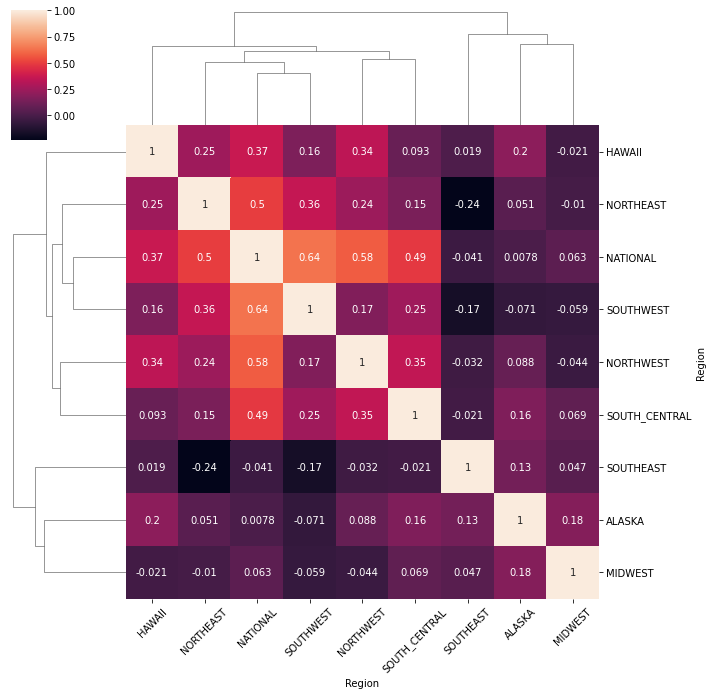

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

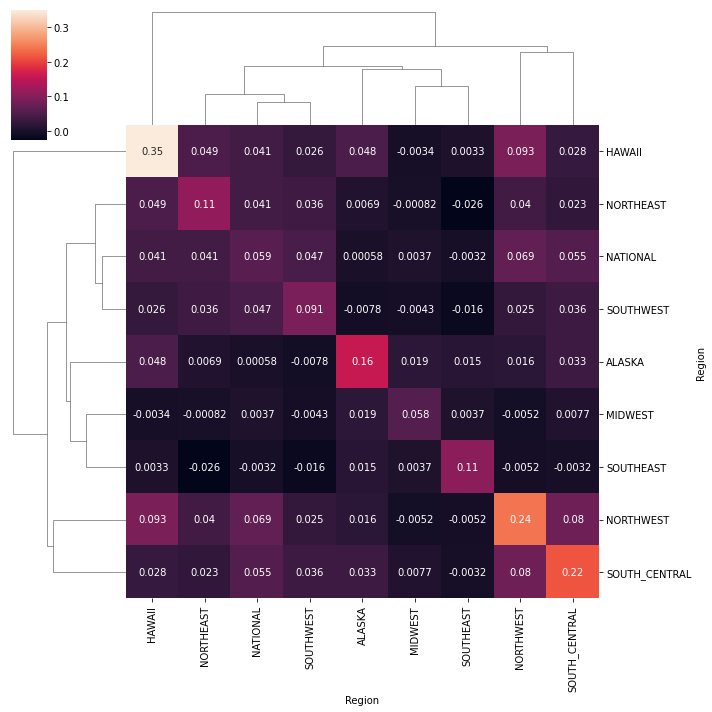

In [ ]:
import seaborn as sns
grid2 = sns.clustermap(spread_correlation2, annot=True)
fig2 = grid.fig
axes2 = fig2.axes
ax2 = axes2[2]
ax2.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!